<a href="https://colab.research.google.com/github/Alton1998/Tensorflow-tutorial-2.0/blob/main/CNN_Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip -q cell_images.zip -d cell_images

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
import os

In [5]:
ROOT = os.path.join("cell_images","cell_images")
test_path = os.path.join(ROOT,"test")
train_path = os.path.join(ROOT,"train")

In [6]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_path,"uninfected")):
  img = imread(os.path.join(test_path,"uninfected",image_filename))
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

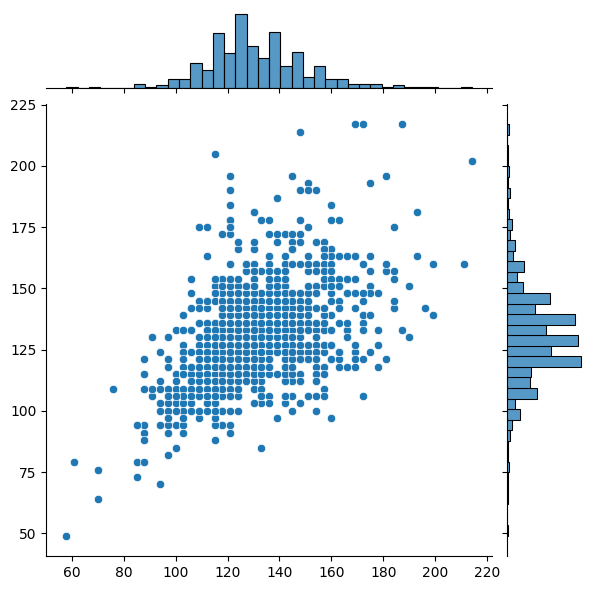

In [7]:
sns.jointplot(x=dim1,y=dim2)

In [8]:
np.mean(dim1)

130.92538461538462

In [9]:
np.mean(dim2)

130.75

In [10]:
image_shape=(130,130,3)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range = 0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation

In [16]:
model = Sequential()

In [17]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
batch_size = 16

In [22]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.src.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
      directory: string, path to the target directory. It should contain
        one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
        inside each of the subdirectories directory tree will be included
        in the generator. See [this script](
        https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
        for more details.
      target_size: Tuple of integers `(height, width)`. The dimensions to
        which all images found will be

In [23]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [24]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [27]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 873s 560ms/step - loss: 0.6910 - accuracy: 0.5418 - val_loss: 0.6844 - val_accuracy: 0.5604
Epoch 2/20
1560/1560 [==============================] - 834s 534ms/step - loss: 0.6809 - accuracy: 0.5703 - val_loss: 0.6739 - val_accuracy: 0.5950
Epoch 3/20
1560/1560 [==============================] - 805s 516ms/step - loss: 0.6739 - accuracy: 0.5915 - val_loss: 0.6808 - val_accuracy: 0.5838
Epoch 4/20
1560/1560 [==============================] - 803s 514ms/step - loss: 0.6839 - accuracy: 0.5763 - val_loss: 0.6784 - val_accuracy: 0.5877


In [28]:
losses = pd.DataFrame(model.history.history)

<Axes: >

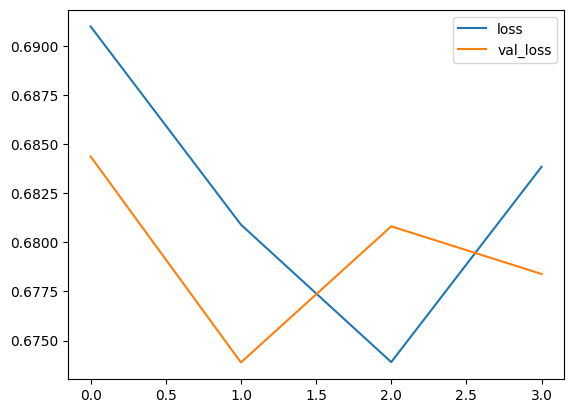

In [29]:
losses[['loss','val_loss']].plot()